##All State Claim Severity 

##Dataset Description

Categorical = 116 
Numerical = 14
Target = 'loss'
Total column = 132

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [0]:
train = pd.read_csv('/content/drive/My Drive/Kaggle/allstate-claims-severity/train.csv')
test = pd.read_csv("/content/drive/My Drive/Kaggle/allstate-claims-severity/test.csv")

In [0]:
train.head(10)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,13,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,C,A,P,J,D,A,A,E,E,H,F,B,BI,CS,A,AS,AE,A,K,DJ,0.546670,0.681761,0.634224,0.373816,0.302678,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
6,14,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,D,E,C,A,P,J,A,A,C,E,E,H,F,B,BI,DK,A,J,AF,A,K,DJ,0.471447,0.737068,0.613660,0.189137,0.295397,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
7,20,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,B,A,A,A,B,A,A,A,A,A,A,A,...,A,C,B,C,E,A,C,T,H,C,A,A,K,F,F,I,G,BI,EB,G,AH,Y,A,P,LO,0.826591,0.488789,0.263570,0.623770,0.473767,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
8,23,A,B,B,B,B,A,A,A,B,B,B,B,B,A,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,...,A,D,C,C,E,C,D,T,C,Q,A,C,H,F,G,M,K,BI,BC,C,K,AX,A,Q,IE,0.330514,0.555782,0.440642,0.473202,0.281143,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
9,24,A,B,A,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,...,H,D,B,C,E,A,C,T,F,D,A,F,K,H,G,J,G,BU,DW,A,U,S,J,O,LY,0.726300,0.358319,0.356819,0.802892,0.310061,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59


In [0]:
for col in train.columns:
  if train[col].dtypes == 'object':
    
    print(col, ':', train[col].unique(), '\nNo of unique values : ', len(train[col].unique()))
    

#a = train.iloc[:,115].unique()
#print(len(a))

cat1 : ['A' 'B'] 
No of unique values :  2
cat2 : ['B' 'A'] 
No of unique values :  2
cat3 : ['A' 'B'] 
No of unique values :  2
cat4 : ['B' 'A'] 
No of unique values :  2
cat5 : ['A' 'B'] 
No of unique values :  2
cat6 : ['A' 'B'] 
No of unique values :  2
cat7 : ['A' 'B'] 
No of unique values :  2
cat8 : ['A' 'B'] 
No of unique values :  2
cat9 : ['B' 'A'] 
No of unique values :  2
cat10 : ['A' 'B'] 
No of unique values :  2
cat11 : ['B' 'A'] 
No of unique values :  2
cat12 : ['A' 'B'] 
No of unique values :  2
cat13 : ['A' 'B'] 
No of unique values :  2
cat14 : ['A' 'B'] 
No of unique values :  2
cat15 : ['A' 'B'] 
No of unique values :  2
cat16 : ['A' 'B'] 
No of unique values :  2
cat17 : ['A' 'B'] 
No of unique values :  2
cat18 : ['A' 'B'] 
No of unique values :  2
cat19 : ['A' 'B'] 
No of unique values :  2
cat20 : ['A' 'B'] 
No of unique values :  2
cat21 : ['A' 'B'] 
No of unique values :  2
cat22 : ['A' 'B'] 
No of unique values :  2
cat23 : ['B' 'A'] 
No of unique values : 

In [0]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [0]:
train.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cat19     0
cat20     0
cat21     0
cat22     0
cat23     0
cat24     0
cat25     0
cat26     0
cat27     0
cat28     0
cat29     0
         ..
cat102    0
cat103    0
cat104    0
cat105    0
cat106    0
cat107    0
cat108    0
cat109    0
cat110    0
cat111    0
cat112    0
cat113    0
cat114    0
cat115    0
cat116    0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

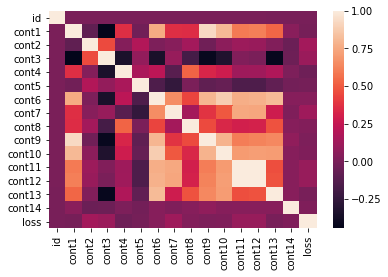

In [0]:
corr = train.corr()
sns.heatmap(corr)

In [0]:
train.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
           ...   
cat102     object
cat103     object
cat104     object
cat105     object
cat106     object
cat107     object
cat108     object
cat109     object
cat110     object
cat111     object
cat112     object
cat113     object
cat114     object
cat115     object
cat116     object
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    

In [0]:
X_train = train.iloc[:,1:131]
y_train = train.iloc[:,131]

##Label Encoding

In [0]:
#Label Encoding
X_train = pd.get_dummies(X_train, drop_first = True)

In [0]:
X_train.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,cat1_B,cat2_B,cat3_B,cat4_B,cat5_B,cat6_B,cat7_B,cat8_B,cat9_B,cat10_B,cat11_B,cat12_B,cat13_B,cat14_B,cat15_B,cat16_B,cat17_B,cat18_B,cat19_B,cat20_B,cat21_B,cat22_B,cat23_B,cat24_B,cat25_B,cat26_B,...,cat116_LU,cat116_LV,cat116_LW,cat116_LX,cat116_LY,cat116_M,cat116_MA,cat116_MB,cat116_MC,cat116_MD,cat116_ME,cat116_MF,cat116_MG,cat116_MH,cat116_MI,cat116_MJ,cat116_MK,cat116_ML,cat116_MM,cat116_MN,cat116_MO,cat116_MP,cat116_MQ,cat116_MR,cat116_MS,cat116_MT,cat116_MU,cat116_MV,cat116_MW,cat116_O,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


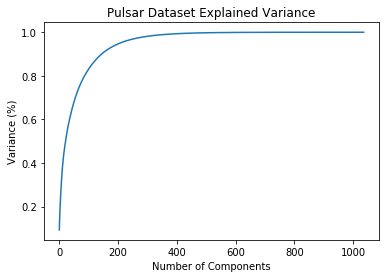

In [0]:
#Applying PCA

from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('All State Claim Severity Dataset Explained Variance')
plt.show()

In [0]:

pca = PCA(n_components=300)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)

In [0]:
print(principalDf.shape)
principalDf = principalDf.iloc[:,:].values

(188318, 300)


In [0]:
test.shape

(125546, 131)

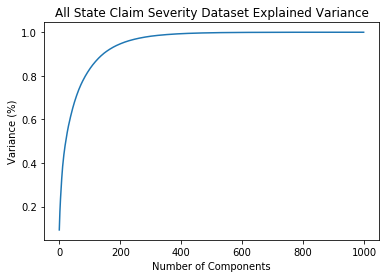

In [0]:
X_test = test.iloc[:,1:132]
#

X_test = pd.get_dummies(X_test, drop_first = True)

X_test = X_test.iloc[:,:].values
#y_test = y_test.iloc[:,].values

#Applying PCA

from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_test)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('All State Claim Severity Dataset Explained Variance')
plt.show()

pca = PCA(n_components=300)
principalComponents_test = pca.fit_transform(X_test)
principalDf_test = pd.DataFrame(data = principalComponents_test)

In [0]:
principalDf_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,1.444427,0.627997,-0.170392,-1.150976,-0.248216,-0.603622,-0.820700,-0.475160,0.607420,-0.439725,-0.052738,0.436589,-0.255725,-0.076284,-0.328940,0.190680,0.239514,-0.395931,-0.062499,-0.129712,-0.296221,0.064342,-0.101654,0.130336,0.082851,0.240630,0.056587,0.243852,-0.148817,0.097331,0.140976,0.696379,0.674100,-0.283846,0.325695,-0.161701,0.053323,-0.143580,-0.164469,0.373374,...,-0.087805,0.015494,-0.069810,-0.018678,0.014827,-0.036552,0.005697,-0.005102,0.075672,0.058311,0.036480,0.055722,0.017298,0.006214,-0.000078,0.036625,-0.032330,0.007690,-0.016298,-0.004352,-0.035331,0.014116,-0.001011,-0.039944,-0.021325,0.016629,0.006987,-0.022751,0.006910,-0.032566,-0.012671,-0.059642,-0.005392,0.011778,0.010242,0.004811,-0.020441,-0.025409,0.053505,-0.023623
1,-1.292561,0.256382,-0.781310,0.311540,-1.248533,-0.295496,-0.115326,-0.612770,-0.123869,0.166486,-0.355271,0.409399,-0.495531,-0.800005,-0.965369,0.473792,0.460774,-0.105661,0.217346,-0.628750,0.416700,0.071443,0.028443,-0.883931,0.276526,0.524838,-0.137572,0.224659,-0.197193,0.093674,-0.220290,0.569877,-0.165559,0.062035,-0.242685,0.147734,0.762874,0.021393,-0.068938,0.315942,...,-0.062913,0.002621,0.032849,0.019024,-0.019655,-0.008508,-0.037426,0.053322,0.026880,-0.033082,-0.017885,0.003800,0.048230,0.065110,-0.083829,-0.016718,-0.001297,0.012875,0.040378,-0.016942,-0.012157,0.021709,-0.049730,0.000091,0.021359,0.012358,-0.081143,0.001533,-0.006403,-0.026638,0.009808,0.008106,-0.013965,-0.037224,0.007166,0.004083,0.023948,-0.002331,0.095721,0.023881
2,-0.810559,2.132498,0.456250,-0.602069,0.121716,0.738422,-0.245868,0.010520,-0.964653,1.188425,-0.422308,-0.459627,-0.602834,-0.017440,0.141003,-0.249587,0.054517,0.493338,1.019946,1.508624,-0.007488,0.672373,1.434765,0.282301,-0.172032,-0.866513,0.633067,0.377667,0.105731,-0.004834,0.810738,-0.225790,0.305544,-0.215546,0.050393,-0.619456,-0.476672,-0.126992,-0.139487,0.595967,...,-0.018675,-0.102166,-0.020269,-0.069673,-0.159602,-0.068552,-0.026611,0.043116,-0.016890,-0.032492,-0.021293,-0.016041,-0.011477,0.026564,-0.062004,-0.045933,-0.013417,0.023919,-0.077189,-0.042864,-0.025619,0.058771,-0.005673,0.030914,0.026338,0.011123,0.001619,-0.002688,-0.012891,-0.010375,0.002404,-0.046684,0.023349,-0.043915,0.024360,-0.020007,0.040417,0.011806,0.016534,0.018593
3,1.261154,1.291026,0.127786,-1.401550,1.753934,0.975440,0.293470,0.668171,0.163543,0.219548,-1.026787,-0.299243,1.045868,0.447763,-0.287597,-0.325326,-0.533612,0.120665,-0.130630,-0.025044,-0.051584,-0.955431,-0.291357,-0.648611,0.353112,0.611275,0.147079,0.000667,-0.085257,-0.300429,0.568084,0.352013,0.304775,0.021163,-0.047866,0.104623,0.021060,0.179086,0.264271,-0.558326,...,-0.076206,-0.178233,0.104227,0.089470,0.003868,0.011888,-0.153053,0.038880,-0.065328,0.192590,0.066425,0.145033,-0.076622,-0.017740,0.109022,0.040742,0.046558,-0.159360,0.013214,-0.030507,0.163025,0.074709,-0.014560,-0.070469,0.017774,-0.019904,-0.025342,-0.045724,-0.074556,-0.081130,-0.067944,-0.010208,0.130608,-0.086475,0.027551,0.183128,-0.028859,-0.144158,0.073145,-0.032232
4,-1.269313,-1.191453,1.255834,0.346460,-0.569881,-0.246205,-0.075906,0.462932,0.574862,-0.754747,-0.041430,1.334882,-0.019320,0.311668,-0.055201,0.306622,-0.631792,-0.193985,0.077856,-0.360481,0.119427,0.418725,-0.272327,0.103072,0.331982,-0.312784,0.922312,-0.740556,-0.060886,0.164287,0.050143,-0.060914,-0.742791,-0.519329,0.248845,0.582647,0.298516,-0.701941,0.302638,-0.433512,...,0.024688,0.053133,0.023448,-0.013984,-0.006102,-0.033430,0.018071,0.014727,-0.025060,0.037438,-0.010346,-0.110161,-0.049388,0.015181,-0.006955,0.104950,-0.081658,-0.117958,-0.048449,0.028444,0.124837,0.023990,0.070210,0.079263,0.063728,0.043913,0.201265,0.009326,0.168246,0

In [0]:
X_train = X_train.iloc[:,:].values
y_train = y_train.iloc[:,].values

In [0]:
var = np.round(pca.explained_variance_,4)
var

array([2.0539, 1.0324, 0.8194, 0.7102, 0.6016, 0.5539, 0.5456, 0.5125,
       0.4497, 0.44  , 0.3987, 0.3847, 0.3176, 0.3048, 0.2882, 0.275 ,
       0.2517, 0.2407, 0.2286, 0.2075, 0.2009, 0.1988, 0.1947, 0.1894,
       0.1881, 0.182 , 0.1783, 0.1727, 0.1661, 0.1588, 0.1512, 0.144 ,
       0.1421, 0.14  , 0.1381, 0.1344, 0.1322, 0.13  , 0.128 , 0.1263,
       0.1246, 0.1233, 0.119 , 0.1177, 0.1156, 0.1132, 0.1131, 0.1071,
       0.1047, 0.1025, 0.0998, 0.0986, 0.0965, 0.095 , 0.0944, 0.0932,
       0.0912, 0.0893, 0.0881, 0.0872, 0.0856, 0.0839, 0.0824, 0.0807,
       0.0771, 0.0759, 0.0746, 0.0734, 0.0722, 0.0716, 0.0702, 0.0699,
       0.0681, 0.0664, 0.0646, 0.0626, 0.0618, 0.0618, 0.0612, 0.0601,
       0.0595, 0.0585, 0.0572, 0.0568, 0.056 , 0.0552, 0.0541, 0.0532,
       0.0522, 0.0518, 0.0516, 0.051 , 0.0503, 0.0493, 0.0489, 0.0484,
       0.0481, 0.0476, 0.0468, 0.0462, 0.0459, 0.0447, 0.0441, 0.044 ,
       0.0433, 0.0425, 0.0422, 0.0411, 0.0407, 0.0404, 0.0399, 0.0393,
      

##Linear Regression Method

In [0]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(principalDf, y_train)

pred = lm.predict(principalDf_test)

pred.mean()

3037.3376856699792

In [0]:
#Calculating MSE on train data
y_pred_onTrain = lm.predict(principalDf)

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_train, y_pred_onTrain))

4221439.411242868


##Ridge

In [0]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=None,
   tol=0.0001)

model.fit(principalDf, y_train)

pred_ridge = model.predict(principalDf_test)

print(pred_ridge.mean())

3037.3376856699792


In [0]:
#Calculating MSE on train data
y_pred_onTrain = model.predict(principalDf)

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_train, y_pred_onTrain))

4221439.412026025


##Lasso

In [0]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 1.0)

model.fit(principalDf, y_train)

pred_lasso = model.predict(principalDf_test)

print(pred_lasso.mean())

3037.337685669984


In [0]:
#Calculating MSE on train data
y_pred_onTrain = model.predict(principalDf)

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_train, y_pred_onTrain))

##Elastic Regressor

In [0]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

model.fit(principalDf, y_train)

pred_elasticnet = model.predict(principalDf_test)

print(pred_elasticnet.mean())

3037.3376856699833


In [0]:
#Calculating MSE on train data
y_pred_onTrain = model.predict(principalDf)

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_train, y_pred_onTrain))

##KNearestNeighbors

In [0]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

model.fit(principalDf, y_train)

pred_ridge = model.predict(principalDf_test)

print(pred_ridge.mean())

In [0]:
#Calculating MSE on train data
y_pred_onTrain = model.predict(principalDf)

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_train, y_pred_onTrain))

##Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(principalDf, y_train)

pred_dt = model.predict(principalDf_test)

print(pred_dt.mean())

3402.535627180476


In [0]:
#Using Cross validation

from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor()
cross_val_score(regressor, principalDf, y_train, cv=10)

array([-0.31672643, -0.08847359, -0.18212985, -0.09848515, -0.04523435,
       -0.01543521, -0.01511193, -0.07221713, -0.04573932, -0.01761941])

In [0]:
#Calculating MSE on train data
y_pred_onTrain = model.predict(principalDf)

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_train, y_pred_onTrain))

##SVM

In [0]:
from sklearn.svm import SVR

model = SVR(C= 1.0)

model.fit(principalDf, y_train)

pred_svr = model.predict(principalDf_test)

print(pred_svr.mean())


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
#Calculating MSE on train data
y_pred_onTrain = model.predict(principalDf)

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_train, y_pred_onTrain))

##Extra Trees(Bagging)

In [0]:
from sklearn.ensemble import ExtraTreesRegressor
  
model = ExtraTreesRegressor(n_jobs=-1,n_estimators=)

model.fit(principalDf, y_train)

pred_et = model.predict(principalDf_test)

print(pred_et.mean())

In [0]:
#Calculating MSE on train data
y_pred_onTrain = model.predict(principalDf)

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_train, y_pred_onTrain))

##Adaboost (Boosting)

In [0]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(n_estimators=)

model.fit(principalDf, y_train)

pred_ada = model.predict(principalDf_test)

print(pred_ada.mean())

In [0]:
#Calculating MSE on train data
y_pred_onTrain = model.predict(principalDf)

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_train, y_pred_onTrain))

##Stochastic Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=)
                                  
model.fit(principalDf, y_train)

pred_sgb = model.predict(principalDf_test)

print(pred_sgb.mean())

In [0]:
#Calculating MSE on train data
y_pred_onTrain = model.predict(principalDf)

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_train, y_pred_onTrain))

##XGBoostRegressor

In [0]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=)

model.fit(principalDf, y_train)

pred_xgb = model.predict(principalDf_test)

print(pred_xgb.mean())

In [0]:
#Calculating MSE on train data
y_pred_onTrain = model.predict(principalDf)

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_train, y_pred_onTrain))

##Multilayer Perceptron(MLP)

In [0]:
#incomplete
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 150, kernel_initializer = 'uniform', activation = 'relu', input_dim = 300))

# Adding the second hidden layer
model.add(Dense(units = 150, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)